In [46]:
import pandas as pd
import numpy as np
from sklearn import decomposition, preprocessing
from functions import *

In [9]:
# Chargement des fichiers de données
data = pd.read_csv('data/my_courses.csv', decimal=".", index_col=0)
#courses_text = pd.read_csv('data/bag_of_words.csv')
#mystery = pd.read_csv('data/mystery.csv')
data

inscription  progression  \
titreCours                                                                     
Classez_et_segmentez_des_données_visuelles                   29           34   
Initiez-vous_à_la_statistique_inférentielle                  55            4   
Découvrez_les_librairies_Python_pour_la_Data_Sc...           64           64   
Devenez_mentor_sur_OpenClassrooms                            76          100   
Initiez-vous_à_l'algèbre_relationnelle_avec_le_...          192           14   
Entraînez_un_modèle_prédictif_linéaire                      193           65   
Explorez_vos_données_avec_des_algorithmes_non_s...          193           75   
Décrivez_et_nettoyez_votre_jeu_de_données                   195            3   
Créez_votre_Data_Lake                                       203           44   
Développez_une_application_iPhone_avec_le_modèl...          218            3   
Animez_un_atelier_de_créativité                             242           49   
Faites_une_base_de_données_avec_UML                         272            4   
Apprenez_à_programmer_en_Python                             349            4   
Réalisez_des_calculs_distribués_sur_des_données...          377           34   
Évaluez_et_améliorez_les_performances_d'un_modè...          412           58   
Développez_votre_site_web_avec_le_framework_Sym...          713            2   

                                                    moyenneDeClasse  duree  \
titreCours                                                                   
Classez_et_segmentez_des_données_visuelles                      NaN     15   
Initiez-vous_à_la_statistique_inférentielle                    86.0     12   
Découvrez_les_librairies_Python_pour_la_Data_Sc...             96.0     10   
Devenez_mentor_sur_OpenClassrooms                              91.0      6   
Initiez-vous_à_l'algèbre_relationnelle_avec_le_...             92.0     20   
Entraînez_un_modèle_prédictif_linéaire                         84.0     10   
Explorez_vos_données_avec_des_algorithmes_non_s...             85.0     15   
Décrivez_et_nettoyez_votre_jeu_de_données                      95.0     15   
Créez_votre_Data_Lake                                          89.0      8   
Développez_une_application_iPhone_avec_le_modèl...             94.0     30   
Animez_un_atelier_de_créativité                                92.0      6   
Faites_une_base_de_données_avec_UML                            88.0     20   
Apprenez_à_programmer_en_Python                                84.0     40   
Réalisez_des_calculs_distribués_sur_des_données...             85.0     20   
Évaluez_et_améliorez_les_performances_d'un_modè...             90.0     10   
Développez_votre_site_web_avec_le_framework_Sym...             90.0     30   

                                                    difficulte  nbChapitres  \
titreCours                                                                    
Classez_et_segmentez_des_données_visuelles                   3           11   
Initiez-vous_à_la_statistique_inférentielle                  2           21   
Découvrez_les_librairies_Python_pour_la_Data_Sc...           2            8   
Devenez_mentor_sur_OpenClassrooms                            1           12   
Initiez-vous_à_l'algèbre_relationnelle_avec_le_...           2           25   
Entraînez_un_modèle_prédictif_linéaire                       2            9   
Explorez_vos_données_avec_des_algorithmes_non_s...           3           13   
Décrivez_et_nettoyez_votre_jeu_de_données                    2           24   
Créez_votre_Data_Lake                                        2            7   
Développez_une_application_iPhone_avec_le_modèl...           2           20   
Animez_un_atelier_de_créativité                              1           19   
Faites_une_base_de_données_avec_UML                          2           18   
Apprenez_à_programmer_en_Python                              3           38   
Réalisez_des_calculs_

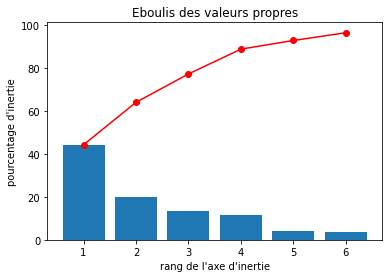

In [41]:
# Nombre de composantes à analyser
n_comp = 6

# Choix des colonnes à intégrer dans l'ACP
data_pca = data[["inscription","progression","moyenneDeClasse","duree","difficulte",
                 "nbChapitres","ratioQuizEvaluation","nbEvaluations"]]

# Préparation des données pour l'ACP
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.fillna(data_pca.mean())
X = data_pca.values
names = data['idCours']
features = data.columns

# Centrage et réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

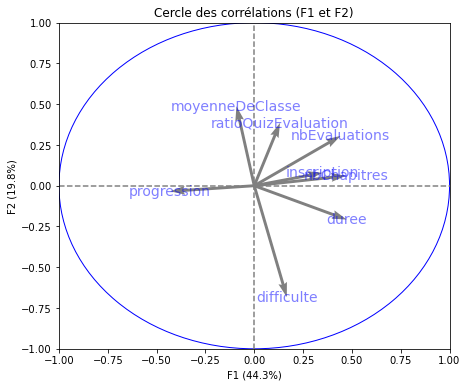

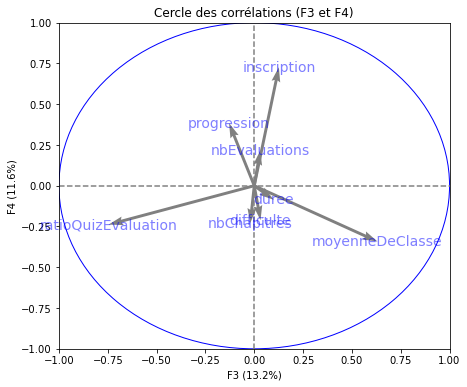

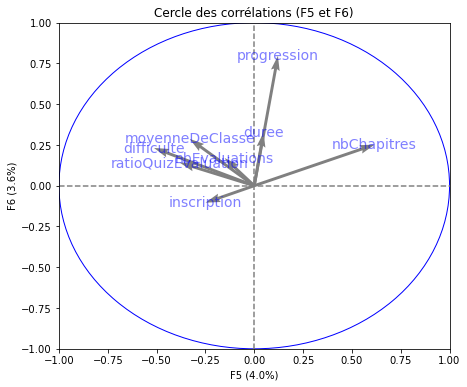

In [42]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


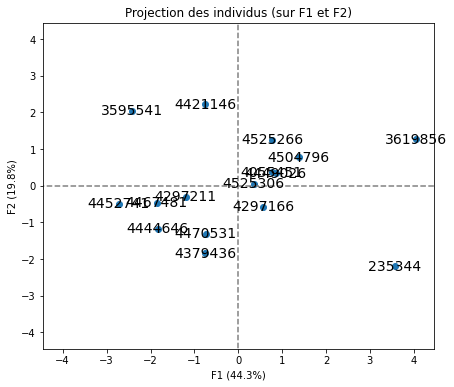

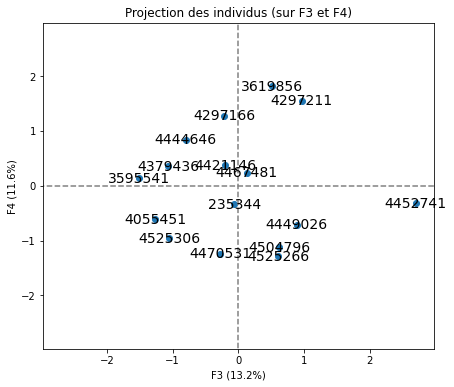

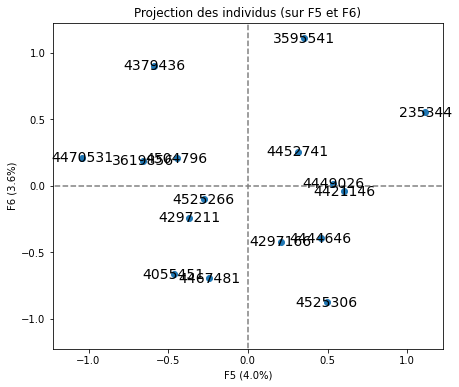

In [45]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
plt.show()

## Jeu de données mystère

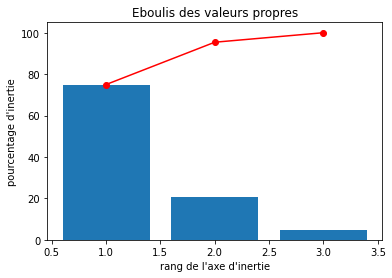

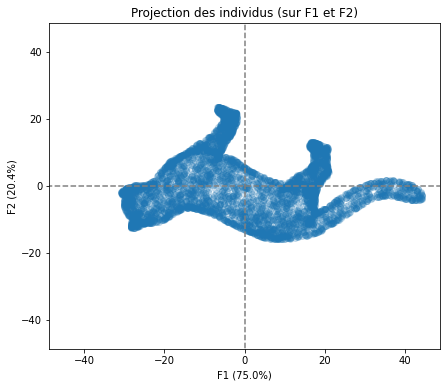

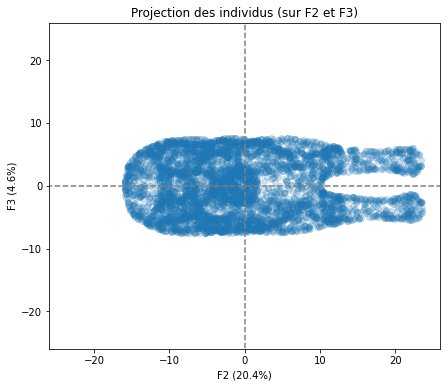

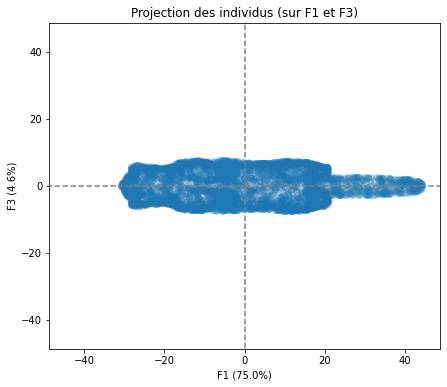

In [47]:
# choix du nombre de composantes à calculer
n_comp = 3

# import de l'échantillon
data = pd.read_csv("data/mystery.csv")
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité. 
# On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X)

# Eboulis des valeurs propres
display_scree_plot(pca)

# projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)

plt.show()

## Bag of words

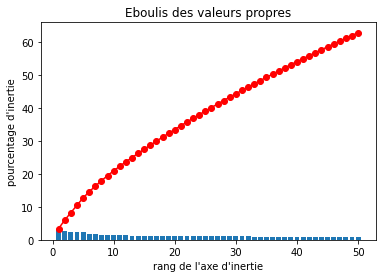

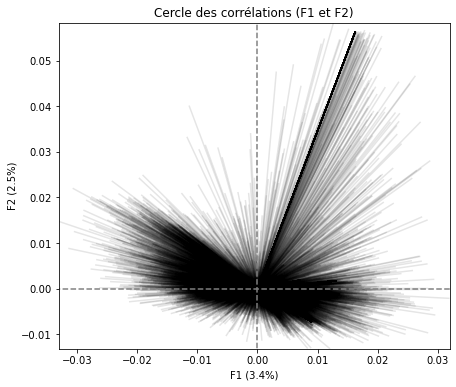

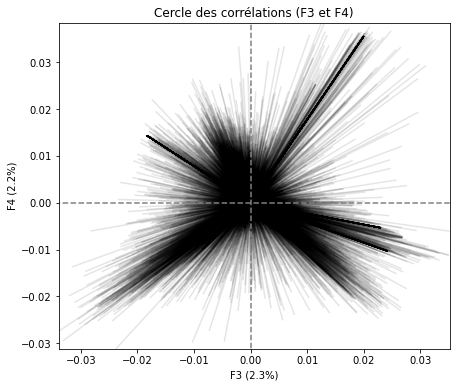

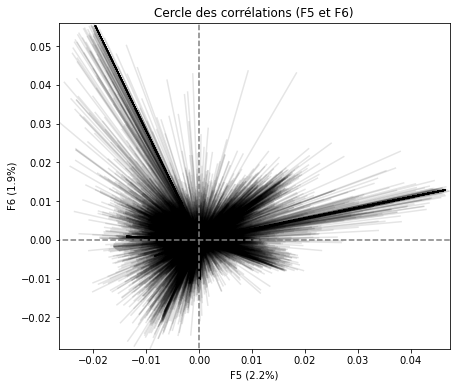

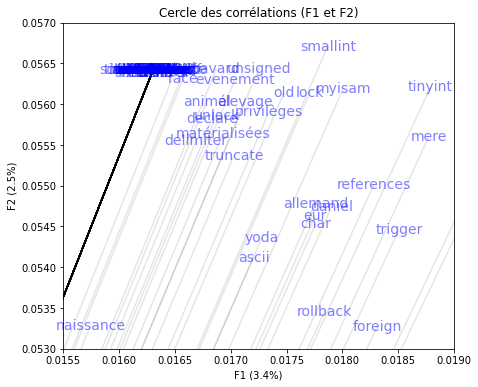

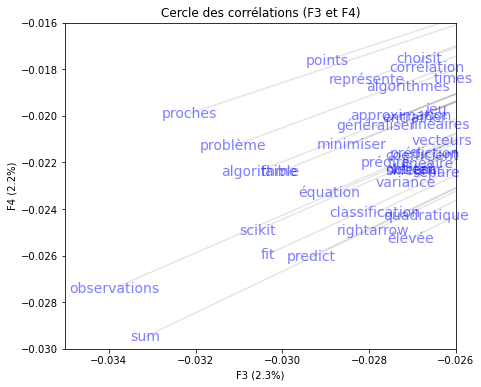

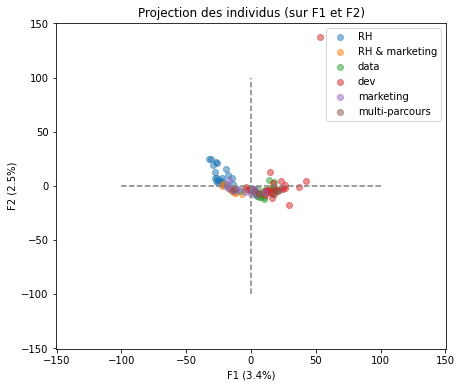

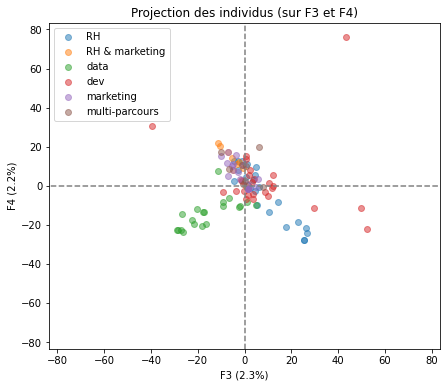

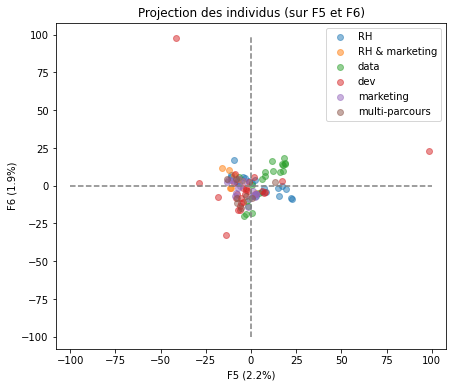

In [50]:
# choix du nombre de composantes à calculer
n_comp = 50

# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('data/bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('data/courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour l'ACP
X = data.values
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = theme, alpha = 0.5)

plt.show()

## TP - Partitionnez vos données

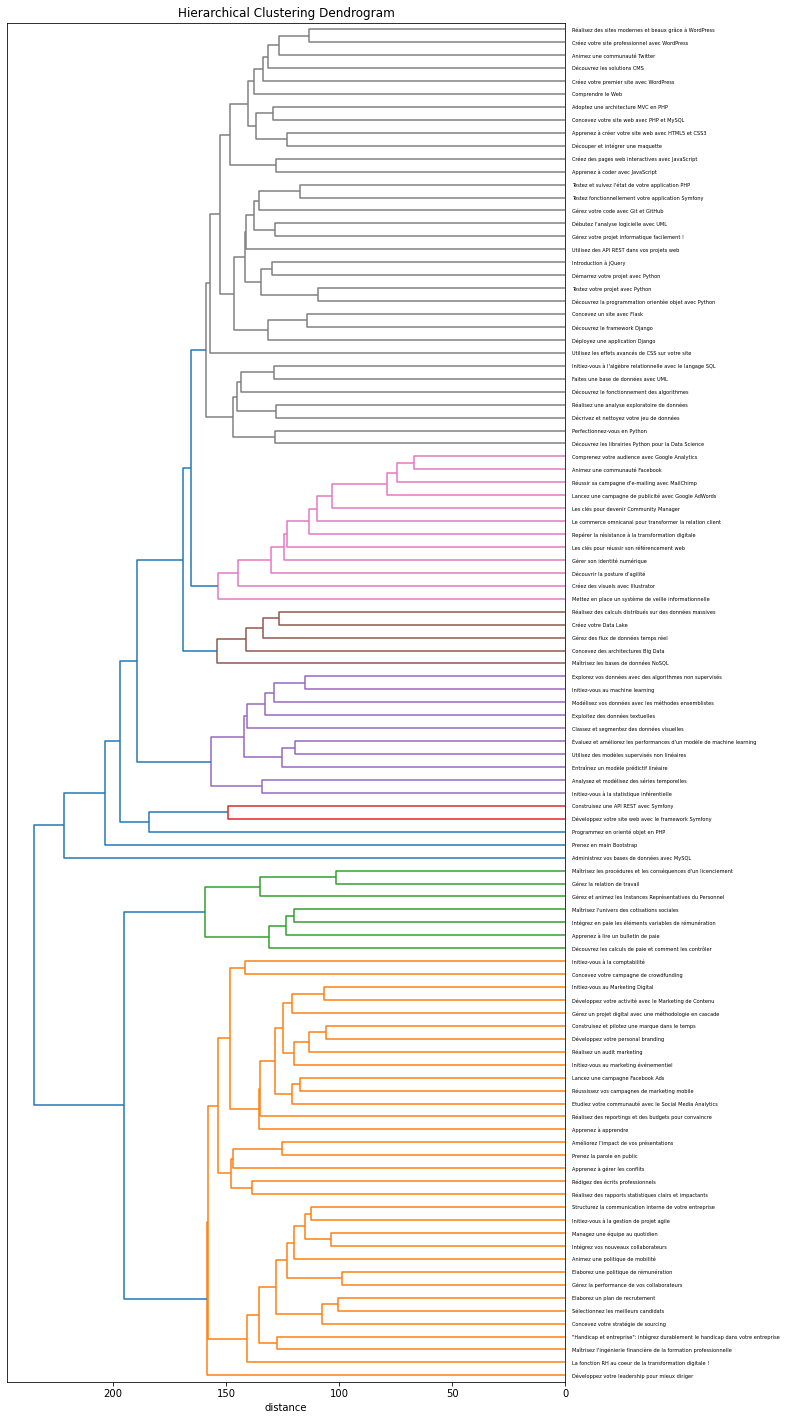

In [52]:
from scipy.cluster.hierarchy import linkage, fcluster

# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('data/bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('data/courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [53]:
# Coupage du dendrogramme en 12 clusters
clusters = fcluster(Z, 12, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({"theme": theme, "cluster": clusters, "title": names})
print(courses)
print(courses.pivot_table(index="theme", columns="cluster", aggfunc=len, fill_value=0))

         theme  cluster                                              title
0         data        7                Concevez des architectures Big Data
1          dev       10                   Apprenez à coder avec JavaScript
2          dev       10          Concevez votre site web avec PHP et MySQL
3    marketing        8     Réussir sa campagne d'e-mailing avec MailChimp
4         data        6      Utilisez des modèles supervisés non linéaires
..         ...      ...                                                ...
100         RH        2                Apprenez à lire un bulletin de paie
101         RH        3  Maîtrisez les procédures et les conséquences d...
102        dev       10         Utilisez des API REST dans vos projets web
103  marketing        1    Construisez et pilotez une marque dans le temps
104       data        9  Initiez-vous à l'algèbre relationnelle avec le...

[105 rows x 3 columns]
               title                                   
cluster           1 

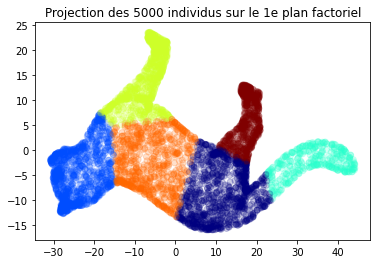

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 6

# import de l'échantillon
data = pd.read_csv('data/mystery.csv')

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)